___
# Ciência dos Dados - PROJETO 1

## Renato Tajima e Thiago Verardo
___

## Descrição do perfil dos brasileiros economicamente ativos

___
## Introdução

O objetivo do projeto é analisar o perfil dos brasileiros economicamente ativos. Com isso, iremos analisar variáveis que influenciam um brasileiro a ser ativo economicamente, seja pela classe, escolaridade, estado, ou o que quisermos ver se é relacionado. 

As informações serão retiradas da PNAD.


___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\thive\Desktop\Insper\Terceiro Semestre\CDdp\CDdp


In [3]:
DF_2015 = pd.read_csv('PES2015.csv',sep=',')
DF_2011 = pd.read_csv('PES2011.csv',sep=',')

In [4]:
DF_2011.head()

,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,V8005,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,2011,11,11000000.0,1,1,2,25,12,1961,49,...,4.0,1.000000e+12,99.0,2,1.0,2.0,2.0,1.0,1.000000e+12,20100000.0
1,2011,11,11000000.0,1,2,4,1,4,1978,33,...,4.0,1.000000e+12,99.0,6,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
2,2011,11,11000000.0,1,3,4,15,6,1996,15,...,4.0,1.000000e+12,99.0,3,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
3,2011,11,11000000.0,1,4,2,3,12,2001,9,...,4.0,1.000000e+12,99.0,2,2.0,NaN,NaN,2.0,1.000000e+12,20100000.0
4,2011,11,11000000.0,2,1,4,16,10,1959,51,...,4.0,1.461000e+03,5.0,4,1.0,2.0,2.0,1.0,1.461000e+03,20100000.0


# Variáveis escolhidas:

Nesse trecho nós iremos adicionar nossas váriaveis a serem analisadas dentro de um novo data frame, que são Unidade de Federação, sexo, idade, cor ou raça, estado civil, saber ler e escrever, rede de ensino, tem telefone móvel, renda. 

In [5]:
#Criando o novo data frame para o ano de 2011

DF_2011_novo = pd.DataFrame()
DF_2011_novo[['UF','SEXO','IDADE','RAÇA','EST_CIV','LER_ESC','REDE_ENS', 'MOBILE','RENDA']] = DF_2011[['UF','V0302','V8005','V0404','V4011','V0601','V6002', 'V06112', 'V9532']]
DF_2011_novo.head(20)

,UF,SEXO,IDADE,RAÇA,EST_CIV,LER_ESC,REDE_ENS,MOBILE,RENDA
0,11,2,49,2,NaN,1,NaN,1.0,1.000000e+12
1,11,4,33,8,NaN,1,4.0,1.0,NaN
2,11,4,15,8,0.0,1,2.0,3.0,NaN
3,11,2,9,2,NaN,1,2.0,NaN,NaN
4,11,4,51,4,1.0,1,NaN,1.0,2.800000e+03
5,11,2,22,4,1.0,1,NaN,1.0,5.450000e+02
6,11,4,17,4,0.0,1,2.0,1.0,NaN
7,11,4,10,8,0.0,1,2.0,1.0,NaN
8,11,4,30,2,0.0,1,NaN,1.0,1.000000e+12
9,11,4,11,8,0.0,1,2.0,3.0,8.000000e+01


In [6]:
#Adicionando a variável de Unidade de Federação no data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.UF == 11), "UF"] = "Rondonia"
    DF_2011_novo.loc[(DF_2011_novo.UF == 12), "UF"] = "Acre"
    DF_2011_novo.loc[(DF_2011_novo.UF == 13), "UF"] = "Amazonas"
    DF_2011_novo.loc[(DF_2011_novo.UF == 14), "UF"] = "Roraima"
    DF_2011_novo.loc[(DF_2011_novo.UF == 15), "UF"] = "Pará"
    DF_2011_novo.loc[(DF_2011_novo.UF == 16), "UF"] = "Amapá"
    DF_2011_novo.loc[(DF_2011_novo.UF == 17), "UF"] = "Tocantins"
    DF_2011_novo.loc[(DF_2011_novo.UF == 21), "UF"] = "Maranhão"
    DF_2011_novo.loc[(DF_2011_novo.UF == 22), "UF"] = "Piauí"
    DF_2011_novo.loc[(DF_2011_novo.UF == 23), "UF"] = "Ceará"
    DF_2011_novo.loc[(DF_2011_novo.UF == 24), "UF"] = "Rio Grande do Norte"
    DF_2011_novo.loc[(DF_2011_novo.UF == 25), "UF"] = "Paraíba"
    DF_2011_novo.loc[(DF_2011_novo.UF == 26), "UF"] = "Pernambuco"
    DF_2011_novo.loc[(DF_2011_novo.UF == 27), "UF"] = "Alagoas"
    DF_2011_novo.loc[(DF_2011_novo.UF == 28), "UF"] = "Sergipe"
    DF_2011_novo.loc[(DF_2011_novo.UF == 29), "UF"] = "Bahia"
    DF_2011_novo.loc[(DF_2011_novo.UF == 31), "UF"] = "Minas Gerais"
    DF_2011_novo.loc[(DF_2011_novo.UF == 32), "UF"] = "Espírito Santo"
    DF_2011_novo.loc[(DF_2011_novo.UF == 33), "UF"] = "Rio de Janeiro"
    DF_2011_novo.loc[(DF_2011_novo.UF == 35), "UF"] = "São Paulo"
    DF_2011_novo.loc[(DF_2011_novo.UF == 41), "UF"] = "Paraná"
    DF_2011_novo.loc[(DF_2011_novo.UF == 42), "UF"] = "Santa Catarina"
    DF_2011_novo.loc[(DF_2011_novo.UF == 43), "UF"] = "Rio Grande do Sul"
    DF_2011_novo.loc[(DF_2011_novo.UF == 50), "UF"] = "Mato Grosso do Sul"
    DF_2011_novo.loc[(DF_2011_novo.UF == 51), "UF"] = "Mato Grosso"
    DF_2011_novo.loc[(DF_2011_novo.UF == 52), "UF"] = "Goiás"
    DF_2011_novo.loc[(DF_2011_novo.UF == 53), "UF"] = "Distrito Federal"

except:""
    
DF_2011_novo.UF.value_counts()

São Paulo              38237
Minas Gerais           31842
Rio Grande do Sul      28459
Bahia                  27795
Rio de Janeiro         25094
Pará                   23539
Pernambuco             21135
Ceará                  18951
Paraná                 17794
Goiás                  14953
Amazonas               11308
Santa Catarina          9724
Maranhão                9168
Distrito Federal        8732
Mato Grosso             7378
Espírito Santo          7135
Rondonia                6825
Mato Grosso do Sul      6414
Paraíba                 6169
Sergipe                 5894
Tocantins               5892
Piauí                   5618
Alagoas                 5534
Rio Grande do Norte     5427
Acre                    4076
Amapá                   3075
Roraima                 2751
Name: UF, dtype: int64

In [7]:
#Adicionando a variável sexo ao data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.SEXO == 2), "SEXO"] = "Masculino"
    DF_2011_novo.loc[(DF_2011_novo.SEXO == 4), "SEXO"] = "Feminino"
    
except:""
    
DF_2011_novo.SEXO.head()

0    Masculino
1     Feminino
2     Feminino
3    Masculino
4     Feminino
Name: SEXO, dtype: object

In [8]:
#Adicionando a variável cor ou raça ao data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 2), "RAÇA"] = "Branca"
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 4), "RAÇA"] = "Preta"
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 6), "RAÇA"] = "Amarela"
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 8), "RAÇA"] = "Parda"
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 0), "RAÇA"] = "Indígena"
    DF_2011_novo.loc[(DF_2011_novo.RAÇA == 9), "RAÇA"] = "Sem declaração"
    
except:""
    
DF_2011_novo.RAÇA.head()

0    Branca
1     Parda
2     Parda
3    Branca
4     Preta
Name: RAÇA, dtype: object

In [9]:
#Adicionando a variável estado civil ao data frame
try:
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV == 1), "EST_CIV"] = "Casado(a)"
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV == 3), "EST_CIV"] = "Desquitado(a) ou Separado(a)"
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV == 5), "EST_CIV"] = "Divorciado(a)"
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV == 7), "EST_CIV"] = "Viúvo(a)"
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV == 0), "EST_CIV"] = "Solteiro(a)"
    DF_2011_novo.loc[(DF_2011_novo.EST_CIV.isnull() == True), "EST_CIV"] = "Não Se Aplica" 
    
except:""
    
    
DF_2011_novo.EST_CIV.head()

0    Não Se Aplica
1    Não Se Aplica
2      Solteiro(a)
3    Não Se Aplica
4        Casado(a)
Name: EST_CIV, dtype: object

In [10]:
#Adicionando a variável saber ler e escrever ao data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.LER_ESC == 1), "LER_ESC"] = "Sim"
    DF_2011_novo.loc[(DF_2011_novo.LER_ESC == 3), "LER_ESC"] = "Não"
    
except:""
    
    
DF_2011_novo.LER_ESC.head()

0    Sim
1    Sim
2    Sim
3    Sim
4    Sim
Name: LER_ESC, dtype: object

In [11]:
#Adicionando a variável rede de ensino ao data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.REDE_ENS == 2), "REDE_ENS"] = "Público"
    DF_2011_novo.loc[(DF_2011_novo.REDE_ENS == 4), "REDE_ENS"] = "Privado"
    DF_2011_novo.loc[(DF_2011_novo.REDE_ENS.isnull() == True), "REDE_ENS"] = "Não Se Aplica"     
except:""
    
    
DF_2011_novo.REDE_ENS.head()

0    Não Se Aplica
1          Privado
2          Público
3          Público
4    Não Se Aplica
Name: REDE_ENS, dtype: object

In [12]:
#Adicionando a variável de possuir telefone móvel ao data frame

try:
    DF_2011_novo.loc[(DF_2011_novo.MOBILE == 1), "MOBILE"] = "Sim"
    DF_2011_novo.loc[(DF_2011_novo.MOBILE == 3), "MOBILE"] = "Não"
    DF_2011_novo.loc[(DF_2011_novo.MOBILE.isnull() == True), "MOBILE"] = "Não Se Aplica"  
    
except:""
    
    
DF_2011_novo.MOBILE.head()

0              Sim
1              Sim
2              Não
3    Não Se Aplica
4              Sim
Name: MOBILE, dtype: object

In [13]:
#Adicionando a variável idade ao data frame
#Vamos analisar principalmente a parte classificada como Jovem Adulta da população, pelo fato de ela compor uma grande parte
#da população economicamente ativa


try:
#     DF_2011_novo.loc[(DF_2011_novo.IDADE >= 0)&(DF_2011_novo.IDADE <= 13), "IDADE"] = "Criança"
#     DF_2011_novo.loc[(DF_2011_novo.IDADE >= 14)&(DF_2011_novo.IDADE <= 17), "IDADE"] = "Adolescente"
    DF_2011_novo.loc[(DF_2011_novo.IDADE >= 18 )&(DF_2011_novo.IDADE <= 30), "IDADE"] = "Jovem Adulto"
#     DF_2011_novo.loc[(DF_2011_novo.IDADE >= 31)&(DF_2011_novo.IDADE <=50), "IDADE"] = "Adulto"
#     DF_2011_novo.loc[(DF_2011_novo.IDADE >= 51)&(DF_2011_novo.IDADE <= 120), "IDADE"] = "Idoso"
    DF_2011_novo.loc[(DF_2011_novo.IDADE.isnull() == True), "IDADE"] <= "Não Se Aplica"  
except:""

    
DF_2011_novo.IDADE.head()

0    49
1    33
2    15
3     9
4    51
Name: IDADE, dtype: object

In [14]:
#Adicionando a variável renda ao data frame
#Nessa váriavel nós dividimos as classes sociais segundo o http://g1.globo.com/economia/seu-dinheiro/noticia/2013/08/veja-diferencas-entre-conceitos-que-definem-classes-sociais-no-brasil.html
#Vamos analisar principalmente a Baixa Classe Alta pelo nosso próprio interesse

try:
#     DF_2011_novo.loc[(DF_2011_novo.RENDA >= 0)&(DF_2011_novo.RENDA <= 81), "RENDA"] = "Extrema Pobreza"
#     DF_2011_novo.loc[(DF_2011_novo.RENDA == 82)&(DF_2011_novo.RENDA == 162), "RENDA"] = "Pobre"
#     DF_2011_novo.loc[(DF_2011_novo.RENDA == 163 )&(DF_2011_novo.RENDA == 291), "RENDA"] = "Vulnerável"
#     DF_2011_novo.loc[(DF_2011_novo.RENDA == 292)&(DF_2011_novo.RENDA == 441), "RENDA"] = "Baixa Classe Média"
#     DF_2011_novo.loc[(DF_2011_novo.RENDA == 442)&(DF_2011_novo.RENDA == 641), "RENDA"] = "Classe Média"
#     DF_2011_novo.loc[(DF_2011_novo.RENDA == 642)&(DF_2011_novo.RENDA == 1019), "RENDA"] = "Alta Classe Média"
    DF_2011_novo.loc[(DF_2011_novo.RENDA >= 1020)&(DF_2011_novo.RENDA <= 2480), "RENDA"] = "Baixa Classe Alta"
#    DF_2011_novo.loc[(DF_2011_novo.RENDA >= 2482)&(DF_2011_novo.RENDA <= 800000000), "RENDA"] = "Classe Alta"
    DF_2011_novo.loc[(DF_2011_novo.RENDA == 1e+12), "RENDA"] = "Não Declarado"
    DF_2011_novo.loc[(DF_2011_novo.RENDA.isnull() == True), "RENDA"] = "Não Se Aplica"  
except:""

    
DF_2011_novo.RENDA.head()

0    Não Declarado
1    Não Se Aplica
2    Não Se Aplica
3    Não Se Aplica
4             2800
Name: RENDA, dtype: object

In [15]:
DF_2011_novo.head()

,UF,SEXO,IDADE,RAÇA,EST_CIV,LER_ESC,REDE_ENS,MOBILE,RENDA
0,Rondonia,Masculino,49,Branca,Não Se Aplica,Sim,Não Se Aplica,Sim,Não Declarado
1,Rondonia,Feminino,33,Parda,Não Se Aplica,Sim,Privado,Sim,Não Se Aplica
2,Rondonia,Feminino,15,Parda,Solteiro(a),Sim,Público,Não,Não Se Aplica
3,Rondonia,Masculino,9,Branca,Não Se Aplica,Sim,Público,Não Se Aplica,Não Se Aplica
4,Rondonia,Feminino,51,Preta,Casado(a),Sim,Não Se Aplica,Sim,2800


In [16]:
#Criando o novo data frame para o ano de 2011
#Vamos fazer o mesmo procedimento a cima para o ano de 2015

DF_2015_novo = pd.DataFrame()
DF_2015_novo[['UF','SEXO','IDADE','RAÇA','EST_CIV','LER_ESC','REDE_ENS', 'MOBILE','RENDA']] = DF_2015[['UF','V0302','V8005','V0404','V4011','V0601','V6002', 'V06112', 'V9532']]
DF_2015_novo.head()

,UF,SEXO,IDADE,RAÇA,EST_CIV,LER_ESC,REDE_ENS,MOBILE,RENDA
0,11,2,23,8,0.0,1,NaN,1.0,800.0
1,11,4,23,2,5.0,1,NaN,1.0,1150.0
2,11,4,35,8,NaN,1,4.0,1.0,880.0
3,11,2,34,8,NaN,1,NaN,1.0,3000.0
4,11,4,11,8,0.0,1,4.0,1.0,NaN


In [17]:
try:
    DF_2015_novo.loc[(DF_2015_novo.UF == 11), "UF"] = "Rondonia"
    DF_2015_novo.loc[(DF_2015_novo.UF == 12), "UF"] = "Acre"
    DF_2015_novo.loc[(DF_2015_novo.UF == 13), "UF"] = "Amazonas"
    DF_2015_novo.loc[(DF_2015_novo.UF == 14), "UF"] = "Roraima"
    DF_2015_novo.loc[(DF_2015_novo.UF == 15), "UF"] = "Pará"
    DF_2015_novo.loc[(DF_2015_novo.UF == 16), "UF"] = "Amapá"
    DF_2015_novo.loc[(DF_2015_novo.UF == 17), "UF"] = "Tocantins"
    DF_2015_novo.loc[(DF_2015_novo.UF == 21), "UF"] = "Maranhão"
    DF_2015_novo.loc[(DF_2015_novo.UF == 22), "UF"] = "Piauí"
    DF_2015_novo.loc[(DF_2015_novo.UF == 23), "UF"] = "Ceará"
    DF_2015_novo.loc[(DF_2015_novo.UF == 24), "UF"] = "Rio Grande do Norte"
    DF_2015_novo.loc[(DF_2015_novo.UF == 25), "UF"] = "Paraíba"
    DF_2015_novo.loc[(DF_2015_novo.UF == 26), "UF"] = "Pernambuco"
    DF_2015_novo.loc[(DF_2015_novo.UF == 27), "UF"] = "Alagoas"
    DF_2015_novo.loc[(DF_2015_novo.UF == 28), "UF"] = "Sergipe"
    DF_2015_novo.loc[(DF_2015_novo.UF == 29), "UF"] = "Bahia"
    DF_2015_novo.loc[(DF_2015_novo.UF == 31), "UF"] = "Minas Gerais"
    DF_2015_novo.loc[(DF_2015_novo.UF == 32), "UF"] = "Espírito Santo"
    DF_2015_novo.loc[(DF_2015_novo.UF == 33), "UF"] = "Rio de Janeiro"
    DF_2015_novo.loc[(DF_2015_novo.UF == 35), "UF"] = "São Paulo"
    DF_2015_novo.loc[(DF_2015_novo.UF == 41), "UF"] = "Paraná"
    DF_2015_novo.loc[(DF_2015_novo.UF == 42), "UF"] = "Santa Catarina"
    DF_2015_novo.loc[(DF_2015_novo.UF == 43), "UF"] = "Rio Grande do Sul"
    DF_2015_novo.loc[(DF_2015_novo.UF == 50), "UF"] = "Mato Grosso do Sul"
    DF_2015_novo.loc[(DF_2015_novo.UF == 51), "UF"] = "Mato Grosso"
    DF_2015_novo.loc[(DF_2015_novo.UF == 52), "UF"] = "Goiás"
    DF_2015_novo.loc[(DF_2015_novo.UF == 53), "UF"] = "Distrito Federal"

except:""
    
DF_2015_novo.UF.value_counts()

São Paulo              40008
Minas Gerais           32933
Rio Grande do Sul      26259
Bahia                  26155
Rio de Janeiro         25858
Pará                   22489
Pernambuco             21309
Paraná                 18707
Ceará                  17819
Goiás                  14666
Amazonas               12144
Santa Catarina          9544
Maranhão                9194
Distrito Federal        9014
Mato Grosso             7477
Espírito Santo          6568
Rondonia                6562
Paraíba                 6151
Sergipe                 6134
Mato Grosso do Sul      6018
Tocantins               5999
Piauí                   5697
Alagoas                 5316
Rio Grande do Norte     4884
Acre                    4603
Amapá                   2934
Roraima                 2462
Name: UF, dtype: int64

In [18]:
try:
    DF_2015_novo.loc[(DF_2015_novo.SEXO == 2), "SEXO"] = "Masculino"
    DF_2015_novo.loc[(DF_2015_novo.SEXO == 4), "SEXO"] = "Feminino"
    
except:""
    
DF_2015_novo.SEXO.head()

0    Masculino
1     Feminino
2     Feminino
3    Masculino
4     Feminino
Name: SEXO, dtype: object

In [19]:
try:
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 2), "RAÇA"] = "Branca"
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 4), "RAÇA"] = "Preta"
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 6), "RAÇA"] = "Amarela"
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 8), "RAÇA"] = "Parda"
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 0), "RAÇA"] = "Indígena"
    DF_2015_novo.loc[(DF_2015_novo.RAÇA == 9), "RAÇA"] = "Sem declaração"
    
except:""
    
DF_2015_novo.RAÇA.head()

0     Parda
1    Branca
2     Parda
3     Parda
4     Parda
Name: RAÇA, dtype: object

In [20]:
try:
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV == 1), "EST_CIV"] = "Casado(a)"
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV == 3), "EST_CIV"] = "Desquitado(a) ou Separado(a)"
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV == 5), "EST_CIV"] = "Divorciado(a)"
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV == 7), "EST_CIV"] = "Viúvo(a)"
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV == 0), "EST_CIV"] = "Solteiro(a)"
    DF_2015_novo.loc[(DF_2015_novo.EST_CIV.isnull() == True), "EST_CIV"] = "Não Se Aplica" 
    
except:""
    
    
DF_2015_novo.EST_CIV.head()

0      Solteiro(a)
1    Divorciado(a)
2    Não Se Aplica
3    Não Se Aplica
4      Solteiro(a)
Name: EST_CIV, dtype: object

In [21]:
try:
    DF_2015_novo.loc[(DF_2015_novo.LER_ESC == 1), "LER_ESC"] = "Sim"
    DF_2015_novo.loc[(DF_2015_novo.LER_ESC == 3), "LER_ESC"] = "Não"
    
except:""
    
    
DF_2015_novo.LER_ESC.head()

0    Sim
1    Sim
2    Sim
3    Sim
4    Sim
Name: LER_ESC, dtype: object

In [22]:
try:
    DF_2015_novo.loc[(DF_2015_novo.REDE_ENS == 2), "REDE_ENS"] = "Público"
    DF_2015_novo.loc[(DF_2015_novo.REDE_ENS == 4), "REDE_ENS"] = "Privado"
    DF_2015_novo.loc[(DF_2015_novo.REDE_ENS.isnull() == True), "REDE_ENS"] = "Não Se Aplica"     
except:""
    
    
DF_2015_novo.REDE_ENS.head()

0    Não Se Aplica
1    Não Se Aplica
2          Privado
3    Não Se Aplica
4          Privado
Name: REDE_ENS, dtype: object

In [23]:
try:
    DF_2015_novo.loc[(DF_2015_novo.MOBILE == 1), "MOBILE"] = "Sim"
    DF_2015_novo.loc[(DF_2015_novo.MOBILE == 3), "MOBILE"] = "Não"
    DF_2015_novo.loc[(DF_2015_novo.MOBILE.isnull() == True), "MOBILE"] = "Não Se Aplica"  
    
except:""
    
    
DF_2015_novo.MOBILE.head()

0    Sim
1    Sim
2    Sim
3    Sim
4    Sim
Name: MOBILE, dtype: object

In [24]:
try:
#    DF_2015_novo.loc[(DF_2015_novo.IDADE >= 0)&(DF_2015_novo.IDADE <= 13), "IDADE"] = "Criança"
#    DF_2015_novo.loc[(DF_2015_novo.IDADE >= 14)&(DF_2015_novo.IDADE <= 17), "IDADE"] = "Adolescente"
    DF_2015_novo.loc[(DF_2015_novo.IDADE >= 18 )&(DF_2015_novo.IDADE <= 30), "IDADE"] = "Jovem Adulto"
#    DF_2015_novo.loc[(DF_2015_novo.IDADE >= 31)&(DF_2015_novo.IDADE <=50), "IDADE"] = "Adulto"
#    DF_2015_novo.loc[(DF_2015_novo.IDADE >= 51)&(DF_2015_novo.IDADE <= 120), "IDADE"] = "Idoso"
#    DF_2015_novo.loc[(DF_2015_novo.IDADE.isnull() == True), "IDADE"] <= "Não Se Aplica"  
except:""

    
DF_2015_novo.IDADE.head()

0    Jovem Adulto
1    Jovem Adulto
2              35
3              34
4              11
Name: IDADE, dtype: object

In [25]:

try:
#     DF_2015_novo.loc[(DF_2015_novo.RENDA >= 0)&(DF_2015_novo.RENDA <= 81), "RENDA"] = "Extrema Pobreza"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 82)&(DF_2015_novo.RENDA == 162), "RENDA"] = "Pobre"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 163 )&(DF_2015_novo.RENDA == 291), "RENDA"] = "Vulnerável"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 292)&(DF_2015_novo.RENDA == 441), "RENDA"] = "Baixa Classe Média"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 442)&(DF_2015_novo.RENDA == 641), "RENDA"] = "Classe Média"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 642)&(DF_2015_novo.RENDA == 1019), "RENDA"] = "Alta Classe Média"
     DF_2015_novo.loc[(DF_2015_novo.RENDA >= 1020)&(DF_2015_novo.RENDA <= 2480), "RENDA"] = "Baixa Classe Alta"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA == 2482)&(DF_2015_novo.RENDA == 800000000), "RENDA"] = "Classe Alta"
     DF_2015_novo.loc[(DF_2015_novo.RENDA == 1e+12), "RENDA"] = "Não Declarado"
#     DF_2015_novo.loc[(DF_2015_novo.RENDA.isnull() == True), "RENDA"] = "Não Se Aplica"  
except:""

    
DF_2015_novo.RENDA.head()

0                  800
1    Baixa Classe Alta
2                  880
3                 3000
4                  NaN
Name: RENDA, dtype: object

**(Todas as classes, assim como todas as idades não foram classificadas porque não usariamos para a análise)**

In [26]:
DF_2015_novo.head()

,UF,SEXO,IDADE,RAÇA,EST_CIV,LER_ESC,REDE_ENS,MOBILE,RENDA
0,Rondonia,Masculino,Jovem Adulto,Parda,Solteiro(a),Sim,Não Se Aplica,Sim,800
1,Rondonia,Feminino,Jovem Adulto,Branca,Divorciado(a),Sim,Não Se Aplica,Sim,Baixa Classe Alta
2,Rondonia,Feminino,35,Parda,Não Se Aplica,Sim,Privado,Sim,880
3,Rondonia,Masculino,34,Parda,Não Se Aplica,Sim,Não Se Aplica,Sim,3000
4,Rondonia,Feminino,11,Parda,Solteiro(a),Sim,Privado,Sim,NaN


___
## Análise e Resultados

Após criarmos os data frames, podemos analisar os dados separados e ver os resultados, para que assim, ao final de tudo, conseguirmos tirar alguma conclusão sólida

### Pergunta Norteadora:
 
 O numero e perfil de pessoas que são de **baixa classe alta** aumentou por conta da tecnologia/internete móvel? E o número de homens que ganham mais que mulheres mudou? E o que influencia nessa mudança, caso exista. 
 
 Os dados mudam ao analisarmos os jovens adultos?

In [27]:
comparacao_sexo = (DF_2015_novo["SEXO"].value_counts(normalize='index')*100).round(decimals=1)
comparacao_sexo

Feminino     51.5
Masculino    48.5
Name: SEXO, dtype: float64

Segundo os dados a cima, pode-se observar que existem mais mulheres do que homens na pesquisa.

In [28]:
#Cruzando os dados sobre sexo e renda do ano de 2011

sexo_din_2011 = pd.crosstab(DF_2011_novo["SEXO"],DF_2011_novo["RENDA"].loc[DF_2011_novo["RENDA"]=="Baixa Classe Alta"], rownames=["SEXO"], colnames=["RENDA"] )
sexo_din_2011

RENDA,Baixa Classe Alta
SEXO,
Feminino,10531
Masculino,22986


In [29]:
#Cruzando os dados sobre sexo e renda do ano de 2011

sexo_din_2015 = pd.crosstab(DF_2015_novo["SEXO"],DF_2015_novo["RENDA"].loc[DF_2015_novo["RENDA"]=="Baixa Classe Alta"], rownames=["SEXO"], colnames=["RENDA"] )
sexo_din_2015

RENDA,Baixa Classe Alta
SEXO,
Feminino,19141
Masculino,34730


In [30]:
#Comparação da renda entre os dois sexos de forma proporcional

sexo_din_2011['Baixa Classe Alta'][1]/sexo_din_2011['Baixa Classe Alta'][0]

2.1826986990789097

In [31]:
#Comparando da renda entre os dois sexos de forma proporcional

sexo_din_2015['Baixa Classe Alta'][1]/sexo_din_2015['Baixa Classe Alta'][0]

1.8144297581108615

##### Taxa de homens de Baixa Classe Alta por mulheres de Baixa Classe Alta

.

In [32]:
raca_din_2011 = pd.crosstab(DF_2011_novo["RAÇA"],DF_2011_novo["RENDA"].loc[DF_2011_novo["RENDA"]=="Baixa Classe Alta"], rownames=["RAÇA"], colnames=["RENDA"] )
soma_tabela = raca_din_2011.sum().sum()
raca_din_2011*100/soma_tabela

RENDA,Baixa Classe Alta
RAÇA,
Amarela,0.575827
Branca,54.745353
Indígena,0.381896
Parda,36.068264
Preta,8.228660


In [33]:
raca_din_2015 = pd.crosstab(DF_2015_novo["RAÇA"],DF_2015_novo["RENDA"].loc[DF_2015_novo["RENDA"]=="Baixa Classe Alta"], rownames=["RAÇA"], colnames=["RENDA"] )
soma_tabela1 = raca_din_2015.sum().sum()
raca_din_2015*100/soma_tabela1

RENDA,Baixa Classe Alta
RAÇA,
Amarela,0.376826
Branca,47.327876
Indígena,0.297006
Parda,41.762729
Preta,10.235563


##### Comparação entre porcentagens de pessoas de cada raça que pertencem à Baixa Classe Alta

.

In [34]:
raca_esc_2011 = pd.crosstab(DF_2011_novo["RAÇA"],DF_2011_novo["REDE_ENS"].loc[DF_2011_novo["RENDA"]=="Baixa Classe Alta"],colnames=["REDE DE ENSINO"], rownames=["RAÇA"] )
raca_esc_2011

REDE DE ENSINO,Não Se Aplica,Privado,Público
RAÇA,,,
Amarela,180,8,5
Branca,16721,1196,432
Indígena,116,4,8
Parda,11056,706,327
Preta,2529,159,70


In [35]:
raca_esc_2015 = pd.crosstab(DF_2015_novo["RAÇA"],DF_2015_novo["REDE_ENS"].loc[DF_2015_novo["RENDA"]=="Baixa Classe Alta"], colnames=["REDE DE ENSINO"], rownames=["RAÇA"] )
raca_esc_2015

REDE DE ENSINO,Não Se Aplica,Privado,Público
RAÇA,,,
Amarela,188,12,3
Branca,23438,1550,508
Indígena,149,4,7
Parda,20956,1062,480
Preta,5154,247,113


##### Comparação entre a rede de ensino frequentada e a raça das pessoas

.

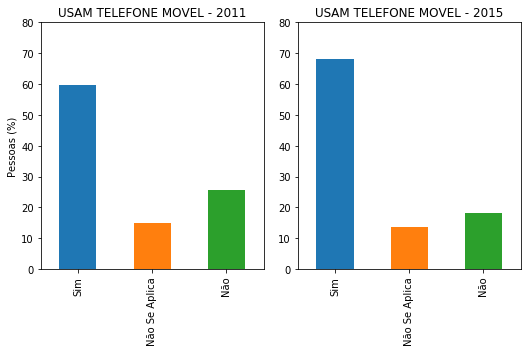

In [36]:
fig = plt.figure(figsize=(11,5))

y_ticks = [10*x for x in range(9)]

plt.subplot(131)
ut1 = (DF_2011_novo['MOBILE'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut1.plot(kind='bar', title = "USAM TELEFONE MOVEL - 2011", yticks=y_ticks)
plt.ylabel("Pessoas (%)")

plt.subplot(132)
ut2 = (DF_2015_novo['MOBILE'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2.plot(kind='bar', title = "USAM TELEFONE MOVEL - 2015", yticks=y_ticks)

plt.tight_layout()
plt.show()

## Somente Jovens adultos:

In [37]:
DF_JA_2011 = DF_2011_novo.loc[(DF_2011_novo.IDADE == "Jovem Adulto")]

In [38]:
DF_JA_2015 = DF_2015_novo.loc[(DF_2015_novo.IDADE == "Jovem Adulto")]

In [39]:
DF_JA_2011_CT = pd.crosstab(DF_JA_2011["SEXO"],DF_JA_2011["RENDA"].loc[DF_JA_2011["RENDA"]=="Baixa Classe Alta"], rownames=["SEXO"], colnames=["RENDA"] )
DF_JA_2011_CT

RENDA,Baixa Classe Alta
SEXO,
Feminino,2953
Masculino,6356


In [40]:
DF_JA_2015_CT = pd.crosstab(DF_JA_2015["SEXO"],DF_JA_2015["RENDA"].loc[DF_JA_2015["RENDA"]=="Baixa Classe Alta"], rownames=["SEXO"], colnames=["RENDA"] )
DF_JA_2015_CT

RENDA,Baixa Classe Alta
SEXO,
Feminino,5371
Masculino,10012


In [41]:
DF_JA_2011_CT['Baixa Classe Alta'][1]/DF_JA_2011_CT['Baixa Classe Alta'][0]

2.1523874026413816

In [42]:
DF_JA_2015_CT['Baixa Classe Alta'][1]/DF_JA_2015_CT['Baixa Classe Alta'][0]

1.8640849003909887

Taxa de jovens adultos de Baixa Classe Alta por jovens adultas de Baixa Classe Alta

In [43]:
raca_din_JA_2011 = pd.crosstab(DF_JA_2011["RAÇA"],DF_JA_2011["RENDA"].loc[DF_JA_2011["RENDA"]=="Baixa Classe Alta"], rownames=["RAÇA"], colnames=["RENDA"] )
soma_tabela2 = raca_din_JA_2011.sum().sum()
raca_din_JA_2011*100/soma_tabela2

RENDA,Baixa Classe Alta
RAÇA,
Amarela,0.666022
Branca,55.816951
Indígena,0.322269
Parda,35.342142
Preta,7.852616


In [44]:
raca_din_JA_2015 = pd.crosstab(DF_JA_2015["RAÇA"],DF_JA_2015["RENDA"].loc[DF_JA_2015["RENDA"]=="Baixa Classe Alta"], rownames=["RAÇA"], colnames=["RENDA"] )
soma_tabela3 = raca_din_JA_2015.sum().sum()
raca_din_JA_2015*100/soma_tabela3

RENDA,Baixa Classe Alta
RAÇA,
Amarela,0.416044
Branca,48.982643
Indígena,0.279529
Parda,40.980303
Preta,9.341481


##### Comparação entre porcentagens de jovens de cada raça que pertencem à Baixa Classe Alta

.

In [45]:
raca_esc_JA_2011 = pd.crosstab(DF_JA_2011["RAÇA"],DF_JA_2011["REDE_ENS"].loc[DF_JA_2011["RENDA"]=="Baixa Classe Alta"], rownames=["REDE DE ENSINO"], colnames=["RENDA"] )
raca_esc_JA_2011

RENDA,Não Se Aplica,Privado,Público
REDE DE ENSINO,,,
Amarela,52,6,4
Branca,4175,792,229
Indígena,24,3,3
Parda,2752,386,152
Preta,619,80,32


In [46]:
raca_esc_JA_2015 = pd.crosstab(DF_JA_2015["RAÇA"],DF_JA_2015["REDE_ENS"].loc[DF_JA_2015["RENDA"]=="Baixa Classe Alta"], rownames=["REDE DE ENSINO"], colnames=["RENDA"] )
raca_esc_JA_2015

RENDA,Não Se Aplica,Privado,Público
REDE DE ENSINO,,,
Amarela,54,8,2
Branca,6170,1062,303
Indígena,38,1,4
Parda,5402,627,275
Preta,1254,128,55


##### Comparação entre a rede de ensino frequentada e a raça dos jovens

.

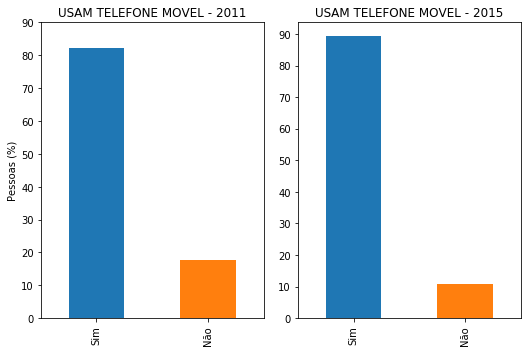

In [47]:
fig = plt.figure(figsize=(11,5))

y_ticks = [10*x for x in range(10)]

plt.subplot(131)
ut1 = (DF_JA_2011['MOBILE'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut1.plot(kind='bar', title = "USAM TELEFONE MOVEL - 2011", yticks=y_ticks)
plt.ylabel("Pessoas (%)")

plt.subplot(132)
ut2 = (DF_JA_2015['MOBILE'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
ut2.plot(kind='bar', title = "USAM TELEFONE MOVEL - 2015", yticks=y_ticks)

plt.tight_layout()
plt.show()

___
## Conclusão 

Descreva aqui suas conclusões!

Agora que a análise está completa, retoma-se as perguntas relacionadas aos dados:
 
 O numero e perfil de pessoas que são de **baixa classe alta** aumentou por conta da tecnologia/internete móvel? E o número de homens que ganham mais que mulheres mudou? E o que influencia nessa mudança, caso exista. 
 
Os dados mudam ao analisarmos os jovens adultos?
 
Respondendo a primeira parte dela, pode-se dizer que realmente existiu um aumento no percentual de pessoas que são de baixa classe alta por conta da tecnologia/internet móvel entre os anos de 2011 e 2015. Nesse gráfico observa-se que o número de pessoas que usam telefone móvel e que estão presentes na classe social a ser analisada aumentou consideravelmente em relação ao ano anterior, barra verde do gráfico (sim). Algo mais interessante e positivo para a sociedade sobre os dados seria que, durante esses anos, existiu um aumento porcentual de algumas raças dentro dessa mesma classe, consequentimente do gráfico também, principalmente pelas "Pardas" e "Pretas", e um declíneo de outras, como "Amarelas" e "Brancas".

Implementando a mesma questão para a idade que foi classificada como "Jovens Adultos", temos o mesmo comportamento presente em relação aumento de pessoas que são de baixa classe alta por conta da tecnologia/internet móvel e até mesmo na parte das raças. Essa mudança pode não ser ter tão brusca, mas mesmo assim existe.

Partindo para a segunda parte da pergunta em relação ao número de homens que ganham mais que mulheres, observa-se primeiramente que ambos os sexos tiveram um bom aumento de números entre os anos analisados, porém em ritmos diferentes, já que a diferença entre eles creseceu. No ano de 2011 essa diferença era de 12455, enquanto que em 2015 esse número sobe para 15589, tendo um aumento de 3134 dessa diferença durante o decorrer dos anos. 

Esse comportamento ainda é observado na idade que foi classificada como "Jovens Adultos" também, uma vez que a diferença também cresceu ao longo do tempo, como observa-se no ano de 2011, onde essa diferença é de 3403, e no ano de 2015, que é de 4641 (ela cresceu 1238 unidades). Pode não ter sido tão grande como a outra, mas mesmo assim é algo preocupante.

Essa diferença significa que a desigualdade salárial entre homens e mulheres tende a aumentar cada vez mais, resultando em mais homens que mulheres nessa classe social por um tempo indefinido. Caso esse comportamento não mude, as mulheres nunca chegarão ao mesmo número que os homens nessa classe, mostrando que essa diferença salarial nunca vai deixar de existir e que as mulheres, em sua grande maioria, não terão as mesmas condições econômicas que os homens, podendo gerar dependência (fortalecendo o machismo).

